In [3]:
import pandas as pd
import numpy as np
import shap
shap.initjs 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('mig_data_test.csv')

In [5]:
df.head(5)

,Total_sleep,Bedtime,Wake_time,Temperature,Pressure,Preventative_medication,Processed_food,Skipped_meal,Alcohol,Cheese,Chocolate,Dehydration,Interrupted_sleep,Congestion,Hangover,Stress,Depressed,Low_blood_sugar,Migraine,date
0,7.1,4.0,6.7,53.8,30.09,0,0,0,0,0,0,0,1,0,1,9,0,0,1,2024-01-01
1,6.3,4.0,7.2,45.4,29.95,0,1,0,0,0,0,1,0,0,0,1,1,0,1,2024-01-02
2,7.3,4.0,7.5,54.3,30.01,1,1,1,0,0,0,1,1,0,0,2,1,0,1,2024-01-03
3,8.3,4.0,7.5,56.8,29.95,1,0,0,1,0,0,0,1,0,0,2,0,0,1,2024-01-04
4,6.2,4.0,7.3,52.1,29.96,0,1,1,0,1,1,1,0,0,0,6,1,0,1,2024-01-05


In [6]:
X = df.drop(columns=["Migraine", "date"])
y = df["Migraine"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [9]:
# Testing Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 1  1]
 [ 0 38]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.97      1.00      0.99        38

    accuracy                           0.97        40
   macro avg       0.99      0.75      0.83        40
weighted avg       0.98      0.97      0.97        40



<Figure size 640x480 with 0 Axes>

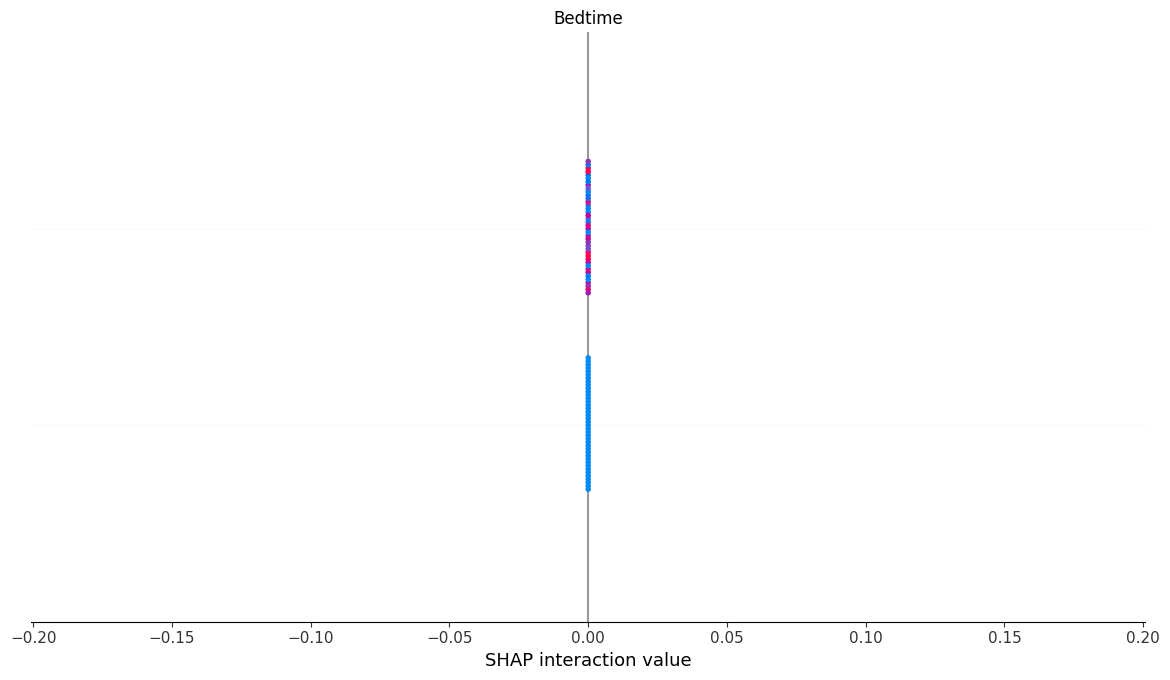

In [10]:
# SHAP Explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
else:
    shap.summary_plot(shap_values, X_test, plot_type="bar")

<Figure size 640x480 with 0 Axes>

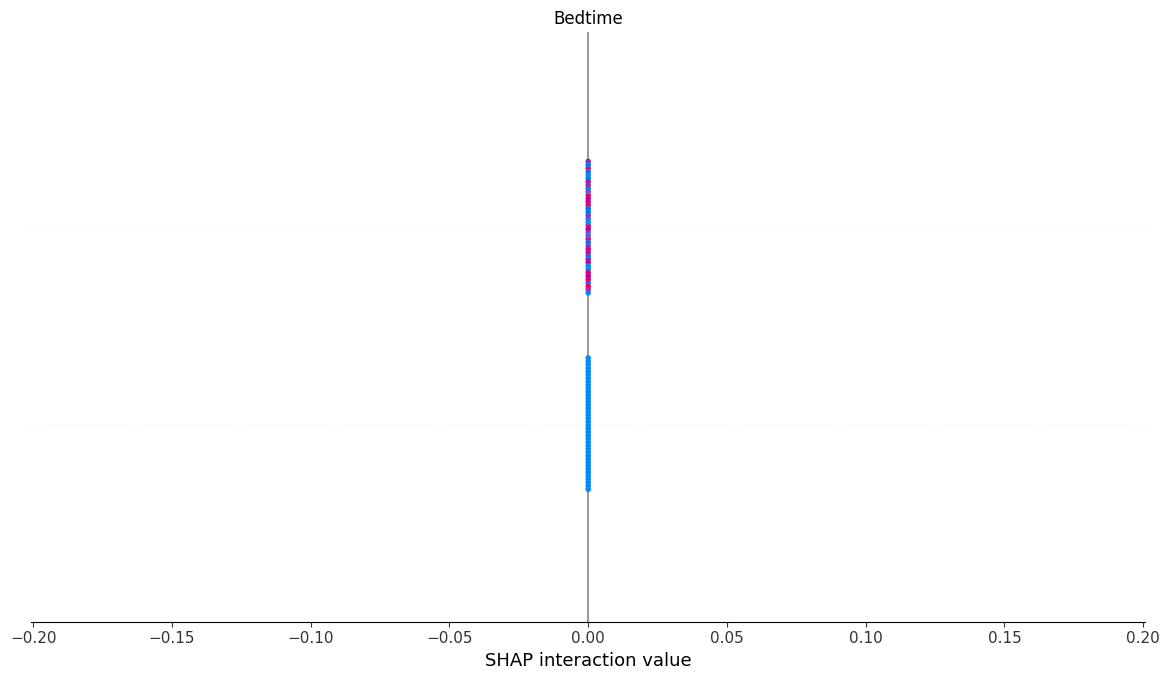

In [11]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [12]:
np.shape(shap_values)

(40, 18, 2)

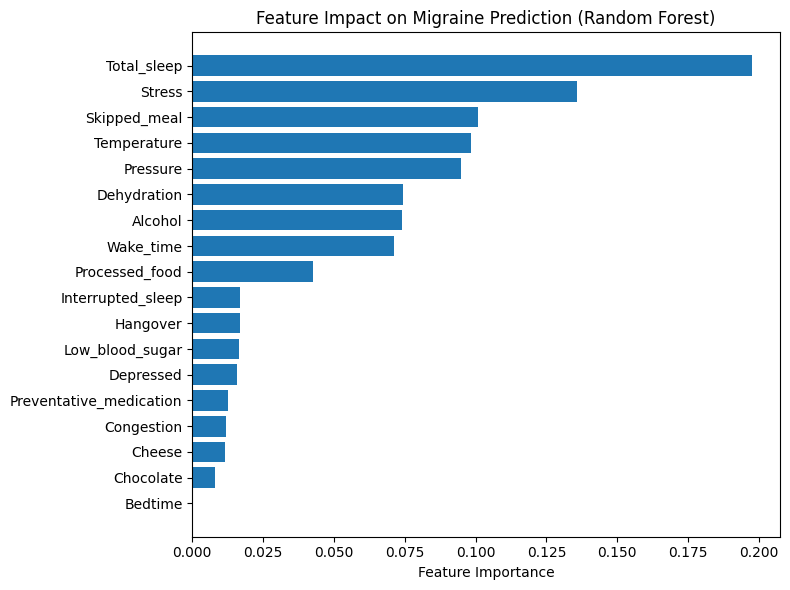

In [13]:
# Feature Importance Plot Using rf_model.feature_importances_
rf_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Impact on Migraine Prediction (Random Forest)")
plt.tight_layout()
plt.show()

In [14]:
# # SHAP Weird Plot
# explainer = shap.TreeExplainer(rf_model)
# shap_values = explainer.shap_values(X_test)

# if isinstance(shap_values, list) and len(shap_values) == 2:
#     shap_values_to_plot = shap_values[1]
# else:
#     shap_values_to_plot = shap_values

# print("SHAP shape:", shap_values_to_plot.shape)
# print("X_test shape:", X_test.shape)

# shap.summary_plot(shap_values_to_plot, X_test, plot_type="bar")

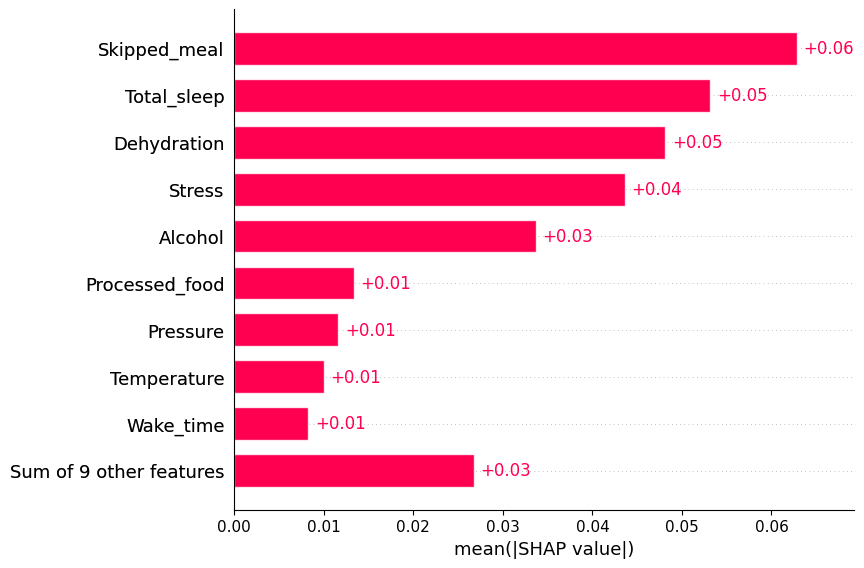

In [15]:
# SHAP Bar Plot
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test, check_additivity=False)

shap_values_class1 = shap_values[..., 1]

shap.plots.bar(shap_values_class1)

In [16]:
# Being able to print out the top 3 triggers
shap_values_class1 = shap_values[..., 1]

shap_values_array = shap_values_class1.values

mean_shap = np.abs(shap_values_array).mean(axis=0)

shap_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_SHAP': mean_shap
}).sort_values(by='Mean_SHAP', ascending=False)

top_3 = shap_df['Feature'].head(3).tolist()

formatted_top_3 = [feat.replace('_', ' ').lower() for feat in top_3]

print(f"Your top 3 triggers are {formatted_top_3[0]}, {formatted_top_3[1]}, and {formatted_top_3[2]}.")

Your top 3 triggers are skipped meal, total sleep, and dehydration.
